In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Stavan/Desktop/Projects/AQI/final_data.csv')
df.head()

,Unnamed: 0,Avg_temp,Max_temp,Min_temp,Avg_relative_humidity(%),Total_rainfall_snowmelt(mm),Avg_visibility,Avg_wind_speed,Max_sustained_wind_speed,PM2.5
0,0,23.4,30.3,19.0,59,0.0,6.3,4.3,5.4,284.795833
1,1,22.4,30.3,16.9,57,0.0,6.9,3.3,7.6,219.720833
2,2,24.0,31.8,16.9,51,0.0,6.9,2.8,5.4,182.187500
3,3,22.8,30.2,17.6,55,0.0,7.7,3.7,7.6,154.037500
4,4,23.1,30.6,17.4,46,0.0,6.9,3.3,5.4,223.208333


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Avg_temp,Max_temp,Min_temp,Avg_relative_humidity(%),Total_rainfall_snowmelt(mm),Avg_visibility,Avg_wind_speed,Max_sustained_wind_speed,PM2.5
0,23.4,30.3,19.0,59,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57,0.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55,0.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46,0.0,6.9,3.3,5.4,223.208333


In [4]:
df.shape

(1052, 9)

<AxesSubplot:>

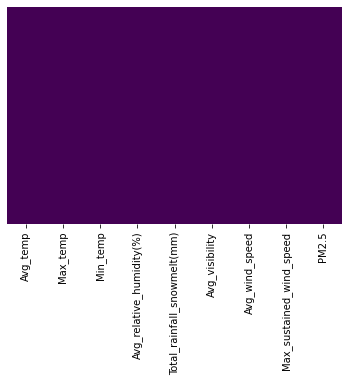

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
df.isnull().sum()

Avg_temp                       0
Max_temp                       0
Min_temp                       0
Avg_relative_humidity(%)       0
Total_rainfall_snowmelt(mm)    0
Avg_visibility                 0
Avg_wind_speed                 0
Max_sustained_wind_speed       0
PM2.5                          0
dtype: int64

In [7]:
x = df.iloc[:,:-1] ## Independent features
y = df.iloc[:,-1] ## Dependent features

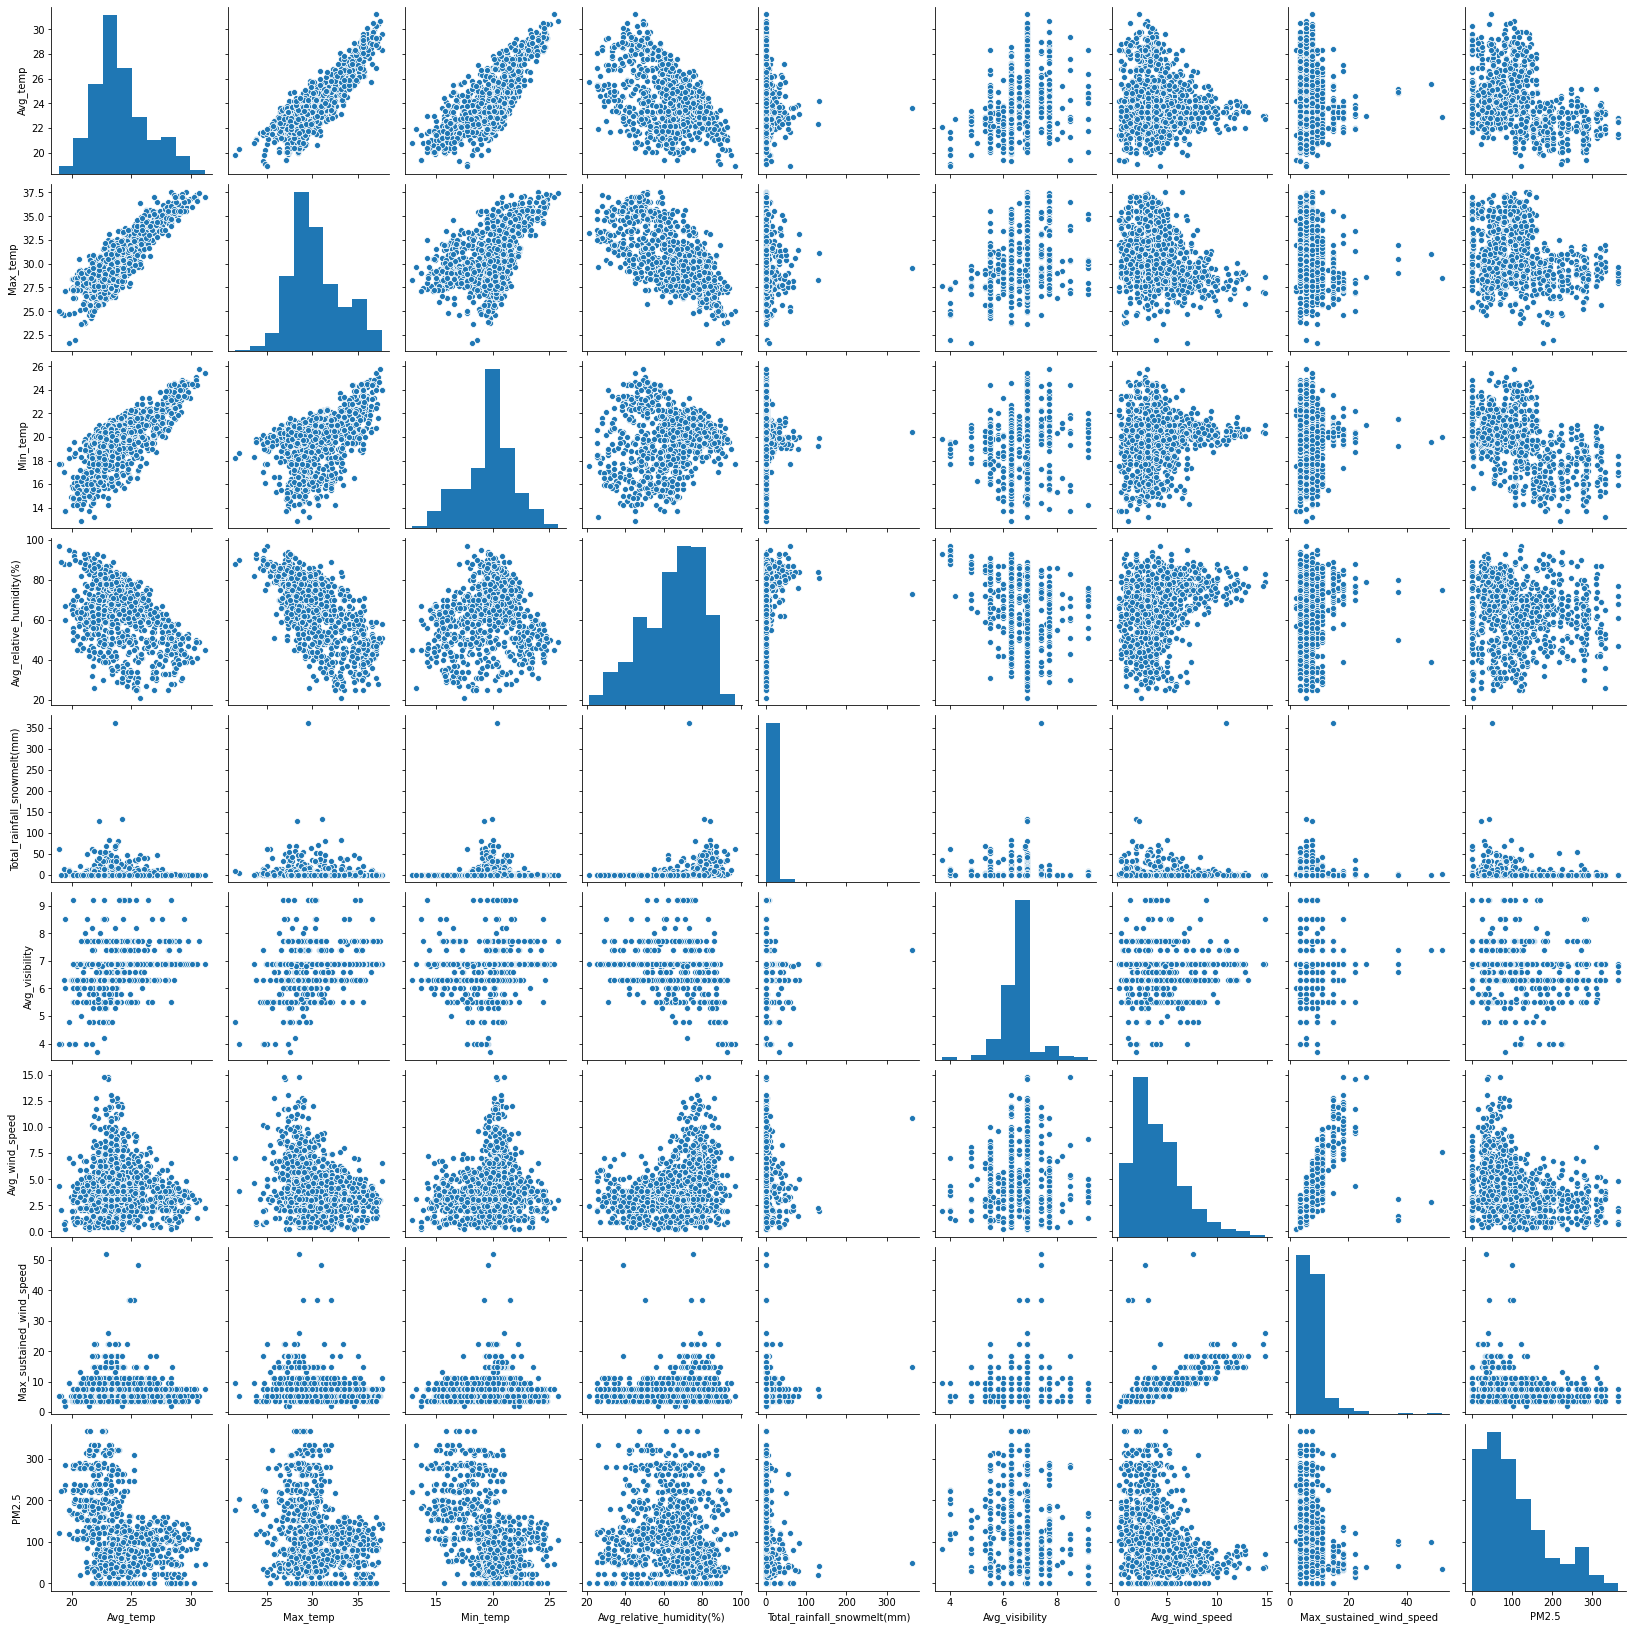

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,Avg_temp,Max_temp,Min_temp,Avg_relative_humidity(%),Total_rainfall_snowmelt(mm),Avg_visibility,Avg_wind_speed,Max_sustained_wind_speed,PM2.5
Avg_temp,1.000000,0.871187,0.757360,-0.453313,-0.067179,0.328463,-0.104600,-0.062568,-0.364204
Max_temp,0.871187,1.000000,0.479999,-0.638229,-0.066942,0.299826,-0.279423,-0.194023,-0.171630
Min_temp,0.757360,0.479999,1.000000,0.154454,0.033201,0.137922,0.164174,0.138062,-0.514921
Avg_relative_humidity(%),-0.453313,-0.638229,0.154454,1.000000,0.225981,-0.280217,0.347107,0.254049,-0.170708
Total_rainfall_snowmelt(mm),-0.067179,-0.066942,0.033201,0.225981,1.000000,-0.065389,0.012071,0.011378,-0.112958
Avg_visibility,0.328463,0.299826,0.137922,-0.280217,-0.065389,1.000000,0.049547,0.041160,-0.133788
Avg_wind_speed,-0.104600,-0.279423,0.164174,0.347107,0.012071,0.049547,1.000000,0.701828,-0.355683
Max_sustained_wind_speed,-0.062568,-0.194023,0.138062,0.254049,0.011378,0.041160,0.701828,1.000000,-0.275539
PM2.5,-0.364204,-0.171630,-0.514921,-0.170708,-0.112958,-0.133788,-0.355683,-0.275539,1.000000


### Correlation Matrix

Correlation states how the feaures are related to the target variable

Correlation can be positive (increase in one unit of the feature increases the value of the target variable) or negative (decrease in one unit of the feature decreases the value of the target variable)

<AxesSubplot:>

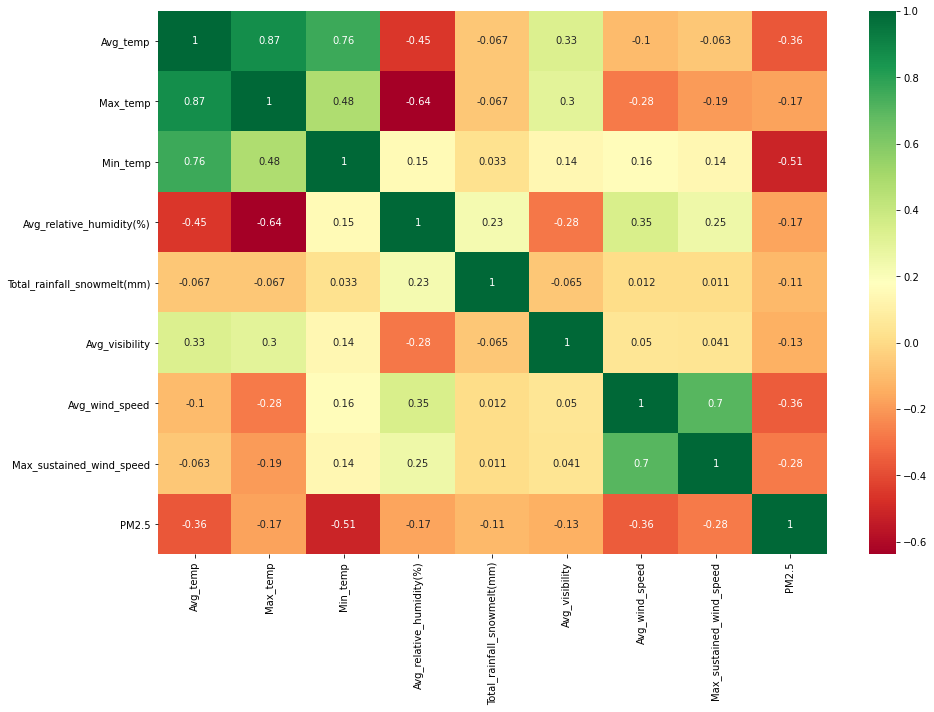

In [10]:
# correlation of each features
correlation = df.corr()
corr_features = correlation.index
plt.figure(figsize=(15,10))

sns.heatmap(df[corr_features].corr(),annot=True, cmap='RdYlGn')

### Feature Importance

By this, you can get the importance of each feature in your dataset

Feature importance gives you a score for each feature of your data, higher the score more important is the feature towards the output variable

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [12]:
print(model.feature_importances_)

[0.19493476 0.10045695 0.28695566 0.11106768 0.05148624 0.05462357
 0.13591996 0.06455517]


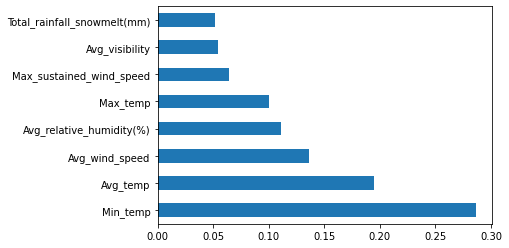

In [13]:
# ploting for better visualization
feat_importance = pd.Series(model.feature_importances_, index = x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

<AxesSubplot:xlabel='PM2.5'>

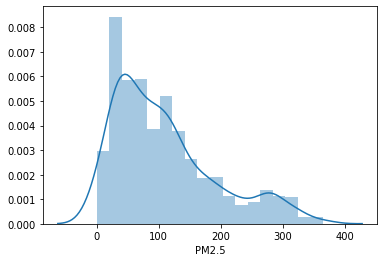

In [14]:
sns.distplot(y)

### ANN

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [18]:
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU,PReLU

In [27]:
ann = Sequential()

# Input layer
ann.add(Dense(128, kernel_initializer='normal', input_dim= X_train.shape[1]))

# Hidden layers
ann.add(Dense(256, kernel_initializer='normal', activation='relu'))
ann.add(Dense(256, kernel_initializer='normal', activation='relu'))
ann.add(Dense(256, kernel_initializer='normal', activation='relu'))

# Output layer
ann.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compile the network
ann.compile(loss='mean_absolute_error',optimizer='adam', metrics=['mean_absolute_error'])

# Fitting the ANN to training set
model = ann.fit(X_train,y_train, batch_size=100, epochs=1000)

Epoch 1/1000
8/8 [==============================] - 0s 4ms/step - loss: 103.2959 - mean_absolute_error: 103.2959
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 72.8574 - mean_absolute_error: 72.8574
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 72.6827 - mean_absolute_error: 72.6827
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 71.2555 - mean_absolute_error: 71.2555
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 68.6786 - mean_absolute_error: 68.6786
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 66.9990 - mean_absolute_error: 66.9990
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 66.0435 - mean_absolute_error: 66.0435
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 65.5989 - mean_absolute_error: 65.5989
Epoch 9/1000
8/8 [==============================] - 0s 3ms/step - loss: 64.5190 - mean_absolute_error: 64.5190

8/8 [==============================] - 0s 4ms/step - loss: 48.0035 - mean_absolute_error: 48.0035
Epoch 74/1000
8/8 [==============================] - 0s 4ms/step - loss: 47.2991 - mean_absolute_error: 47.2991
Epoch 75/1000
8/8 [==============================] - 0s 3ms/step - loss: 46.3819 - mean_absolute_error: 46.3819
Epoch 76/1000
8/8 [==============================] - 0s 3ms/step - loss: 46.0259 - mean_absolute_error: 46.0259
Epoch 77/1000
8/8 [==============================] - 0s 3ms/step - loss: 46.2354 - mean_absolute_error: 46.2354
Epoch 78/1000
8/8 [==============================] - 0s 3ms/step - loss: 46.2023 - mean_absolute_error: 46.2023
Epoch 79/1000
8/8 [==============================] - 0s 3ms/step - loss: 47.5306 - mean_absolute_error: 47.5306
Epoch 80/1000
8/8 [==============================] - 0s 3ms/step - loss: 48.4406 - mean_absolute_error: 48.4406
Epoch 81/1000
8/8 [==============================] - 0s 3ms/step - loss: 46.4827 - mean_absolute_error: 46.4827
Epoch 

8/8 [==============================] - 0s 3ms/step - loss: 45.5539 - mean_absolute_error: 45.5539
Epoch 146/1000
8/8 [==============================] - 0s 3ms/step - loss: 44.5214 - mean_absolute_error: 44.5214
Epoch 147/1000
8/8 [==============================] - 0s 3ms/step - loss: 44.9819 - mean_absolute_error: 44.9819
Epoch 148/1000
8/8 [==============================] - 0s 3ms/step - loss: 44.5173 - mean_absolute_error: 44.5173
Epoch 149/1000
8/8 [==============================] - 0s 3ms/step - loss: 45.5903 - mean_absolute_error: 45.5903
Epoch 150/1000
8/8 [==============================] - 0s 3ms/step - loss: 43.7918 - mean_absolute_error: 43.7918
Epoch 151/1000
8/8 [==============================] - 0s 3ms/step - loss: 43.7940 - mean_absolute_error: 43.7940
Epoch 152/1000
8/8 [==============================] - 0s 3ms/step - loss: 43.5045 - mean_absolute_error: 43.5045
Epoch 153/1000
8/8 [==============================] - 0s 3ms/step - loss: 43.7205 - mean_absolute_error: 43.720

8/8 [==============================] - 0s 3ms/step - loss: 41.5286 - mean_absolute_error: 41.5286
Epoch 218/1000
8/8 [==============================] - 0s 3ms/step - loss: 41.5579 - mean_absolute_error: 41.5579
Epoch 219/1000
8/8 [==============================] - 0s 3ms/step - loss: 42.2451 - mean_absolute_error: 42.2451
Epoch 220/1000
8/8 [==============================] - 0s 3ms/step - loss: 42.9573 - mean_absolute_error: 42.9573
Epoch 221/1000
8/8 [==============================] - 0s 3ms/step - loss: 41.9276 - mean_absolute_error: 41.9276
Epoch 222/1000
8/8 [==============================] - 0s 3ms/step - loss: 42.3114 - mean_absolute_error: 42.3114
Epoch 223/1000
8/8 [==============================] - 0s 3ms/step - loss: 42.5246 - mean_absolute_error: 42.5246
Epoch 224/1000
8/8 [==============================] - 0s 3ms/step - loss: 43.0086 - mean_absolute_error: 43.0086
Epoch 225/1000
8/8 [==============================] - 0s 3ms/step - loss: 41.7594 - mean_absolute_error: 41.759

8/8 [==============================] - 0s 3ms/step - loss: 39.8656 - mean_absolute_error: 39.8656
Epoch 290/1000
8/8 [==============================] - 0s 4ms/step - loss: 41.1465 - mean_absolute_error: 41.1465
Epoch 291/1000
8/8 [==============================] - 0s 3ms/step - loss: 42.4334 - mean_absolute_error: 42.4334
Epoch 292/1000
8/8 [==============================] - 0s 3ms/step - loss: 40.6301 - mean_absolute_error: 40.6301
Epoch 293/1000
8/8 [==============================] - 0s 3ms/step - loss: 40.4432 - mean_absolute_error: 40.4432
Epoch 294/1000
8/8 [==============================] - 0s 3ms/step - loss: 39.2145 - mean_absolute_error: 39.2145
Epoch 295/1000
8/8 [==============================] - 0s 3ms/step - loss: 40.8197 - mean_absolute_error: 40.8197
Epoch 296/1000
8/8 [==============================] - 0s 3ms/step - loss: 41.1413 - mean_absolute_error: 41.1413
Epoch 297/1000
8/8 [==============================] - 0s 3ms/step - loss: 40.1015 - mean_absolute_error: 40.101

8/8 [==============================] - 0s 3ms/step - loss: 36.2360 - mean_absolute_error: 36.2360
Epoch 362/1000
8/8 [==============================] - 0s 3ms/step - loss: 37.0381 - mean_absolute_error: 37.0381
Epoch 363/1000
8/8 [==============================] - 0s 3ms/step - loss: 36.9445 - mean_absolute_error: 36.9445
Epoch 364/1000
8/8 [==============================] - 0s 3ms/step - loss: 37.3676 - mean_absolute_error: 37.3676
Epoch 365/1000
8/8 [==============================] - 0s 3ms/step - loss: 36.2360 - mean_absolute_error: 36.2360
Epoch 366/1000
8/8 [==============================] - 0s 3ms/step - loss: 36.8055 - mean_absolute_error: 36.8055
Epoch 367/1000
8/8 [==============================] - 0s 3ms/step - loss: 37.9314 - mean_absolute_error: 37.9314
Epoch 368/1000
8/8 [==============================] - 0s 3ms/step - loss: 38.0309 - mean_absolute_error: 38.0309
Epoch 369/1000
8/8 [==============================] - 0s 3ms/step - loss: 37.4993 - mean_absolute_error: 37.499

8/8 [==============================] - 0s 4ms/step - loss: 34.9058 - mean_absolute_error: 34.9058
Epoch 434/1000
8/8 [==============================] - 0s 3ms/step - loss: 35.4438 - mean_absolute_error: 35.4438
Epoch 435/1000
8/8 [==============================] - 0s 3ms/step - loss: 36.9112 - mean_absolute_error: 36.9112
Epoch 436/1000
8/8 [==============================] - 0s 3ms/step - loss: 36.3573 - mean_absolute_error: 36.3573
Epoch 437/1000
8/8 [==============================] - 0s 3ms/step - loss: 34.4245 - mean_absolute_error: 34.4245
Epoch 438/1000
8/8 [==============================] - 0s 3ms/step - loss: 36.8192 - mean_absolute_error: 36.8192
Epoch 439/1000
8/8 [==============================] - 0s 3ms/step - loss: 36.5567 - mean_absolute_error: 36.5567
Epoch 440/1000
8/8 [==============================] - 0s 3ms/step - loss: 35.0045 - mean_absolute_error: 35.0045
Epoch 441/1000
8/8 [==============================] - 0s 3ms/step - loss: 36.1689 - mean_absolute_error: 36.168

8/8 [==============================] - 0s 3ms/step - loss: 32.8499 - mean_absolute_error: 32.8499
Epoch 506/1000
8/8 [==============================] - 0s 3ms/step - loss: 33.4504 - mean_absolute_error: 33.4504
Epoch 507/1000
8/8 [==============================] - 0s 3ms/step - loss: 32.0695 - mean_absolute_error: 32.0695
Epoch 508/1000
8/8 [==============================] - 0s 3ms/step - loss: 31.9901 - mean_absolute_error: 31.9901
Epoch 509/1000
8/8 [==============================] - 0s 4ms/step - loss: 31.5347 - mean_absolute_error: 31.5347
Epoch 510/1000
8/8 [==============================] - 0s 3ms/step - loss: 31.7091 - mean_absolute_error: 31.7091
Epoch 511/1000
8/8 [==============================] - 0s 3ms/step - loss: 32.7745 - mean_absolute_error: 32.7745
Epoch 512/1000
8/8 [==============================] - 0s 3ms/step - loss: 32.4298 - mean_absolute_error: 32.4298
Epoch 513/1000
8/8 [==============================] - 0s 3ms/step - loss: 34.6488 - mean_absolute_error: 34.648

8/8 [==============================] - 0s 2ms/step - loss: 33.8732 - mean_absolute_error: 33.8732
Epoch 578/1000
8/8 [==============================] - 0s 4ms/step - loss: 31.2157 - mean_absolute_error: 31.2157
Epoch 579/1000
8/8 [==============================] - 0s 3ms/step - loss: 29.9451 - mean_absolute_error: 29.9451
Epoch 580/1000
8/8 [==============================] - 0s 3ms/step - loss: 30.4534 - mean_absolute_error: 30.4534
Epoch 581/1000
8/8 [==============================] - 0s 3ms/step - loss: 31.0015 - mean_absolute_error: 31.0015
Epoch 582/1000
8/8 [==============================] - 0s 3ms/step - loss: 30.8173 - mean_absolute_error: 30.8173
Epoch 583/1000
8/8 [==============================] - 0s 3ms/step - loss: 29.2000 - mean_absolute_error: 29.2000
Epoch 584/1000
8/8 [==============================] - 0s 2ms/step - loss: 29.6042 - mean_absolute_error: 29.6042
Epoch 585/1000
8/8 [==============================] - 0s 2ms/step - loss: 29.5843 - mean_absolute_error: 29.584

8/8 [==============================] - 0s 3ms/step - loss: 29.4013 - mean_absolute_error: 29.4013
Epoch 650/1000
8/8 [==============================] - 0s 3ms/step - loss: 29.6633 - mean_absolute_error: 29.6633
Epoch 651/1000
8/8 [==============================] - 0s 2ms/step - loss: 28.4559 - mean_absolute_error: 28.4559
Epoch 652/1000
8/8 [==============================] - 0s 3ms/step - loss: 29.7791 - mean_absolute_error: 29.7791
Epoch 653/1000
8/8 [==============================] - 0s 2ms/step - loss: 29.9384 - mean_absolute_error: 29.9384
Epoch 654/1000
8/8 [==============================] - 0s 3ms/step - loss: 30.0784 - mean_absolute_error: 30.0784
Epoch 655/1000
8/8 [==============================] - 0s 2ms/step - loss: 28.4527 - mean_absolute_error: 28.4527
Epoch 656/1000
8/8 [==============================] - 0s 1ms/step - loss: 28.0494 - mean_absolute_error: 28.0494
Epoch 657/1000
8/8 [==============================] - 0s 3ms/step - loss: 27.5102 - mean_absolute_error: 27.510

8/8 [==============================] - 0s 4ms/step - loss: 26.2465 - mean_absolute_error: 26.2465
Epoch 722/1000
8/8 [==============================] - 0s 3ms/step - loss: 28.3665 - mean_absolute_error: 28.3665
Epoch 723/1000
8/8 [==============================] - 0s 2ms/step - loss: 28.6621 - mean_absolute_error: 28.6621
Epoch 724/1000
8/8 [==============================] - 0s 2ms/step - loss: 28.0336 - mean_absolute_error: 28.0336
Epoch 725/1000
8/8 [==============================] - 0s 3ms/step - loss: 29.9316 - mean_absolute_error: 29.9316
Epoch 726/1000
8/8 [==============================] - 0s 2ms/step - loss: 28.6373 - mean_absolute_error: 28.6373
Epoch 727/1000
8/8 [==============================] - 0s 3ms/step - loss: 27.6826 - mean_absolute_error: 27.6826
Epoch 728/1000
8/8 [==============================] - 0s 3ms/step - loss: 26.7746 - mean_absolute_error: 26.7746
Epoch 729/1000
8/8 [==============================] - 0s 3ms/step - loss: 27.9700 - mean_absolute_error: 27.970

8/8 [==============================] - 0s 2ms/step - loss: 25.7553 - mean_absolute_error: 25.7553
Epoch 794/1000
8/8 [==============================] - 0s 3ms/step - loss: 25.8935 - mean_absolute_error: 25.8935
Epoch 795/1000
8/8 [==============================] - 0s 3ms/step - loss: 24.1318 - mean_absolute_error: 24.1318
Epoch 796/1000
8/8 [==============================] - 0s 2ms/step - loss: 25.9270 - mean_absolute_error: 25.9270
Epoch 797/1000
8/8 [==============================] - 0s 4ms/step - loss: 25.6930 - mean_absolute_error: 25.6930
Epoch 798/1000
8/8 [==============================] - 0s 2ms/step - loss: 24.8487 - mean_absolute_error: 24.8487
Epoch 799/1000
8/8 [==============================] - 0s 1ms/step - loss: 24.0347 - mean_absolute_error: 24.0347
Epoch 800/1000
8/8 [==============================] - 0s 2ms/step - loss: 25.0008 - mean_absolute_error: 25.0008
Epoch 801/1000
8/8 [==============================] - 0s 4ms/step - loss: 25.4778 - mean_absolute_error: 25.477

8/8 [==============================] - 0s 3ms/step - loss: 23.1959 - mean_absolute_error: 23.1959
Epoch 866/1000
8/8 [==============================] - 0s 3ms/step - loss: 22.1597 - mean_absolute_error: 22.1597
Epoch 867/1000
8/8 [==============================] - 0s 3ms/step - loss: 22.3149 - mean_absolute_error: 22.3149
Epoch 868/1000
8/8 [==============================] - 0s 3ms/step - loss: 24.6397 - mean_absolute_error: 24.6397
Epoch 869/1000
8/8 [==============================] - 0s 3ms/step - loss: 24.9147 - mean_absolute_error: 24.9147
Epoch 870/1000
8/8 [==============================] - 0s 3ms/step - loss: 24.5316 - mean_absolute_error: 24.5316
Epoch 871/1000
8/8 [==============================] - 0s 4ms/step - loss: 22.6104 - mean_absolute_error: 22.6104
Epoch 872/1000
8/8 [==============================] - 0s 4ms/step - loss: 24.8366 - mean_absolute_error: 24.8366
Epoch 873/1000
8/8 [==============================] - 0s 3ms/step - loss: 24.3973 - mean_absolute_error: 24.397

8/8 [==============================] - 0s 3ms/step - loss: 20.8182 - mean_absolute_error: 20.8182
Epoch 938/1000
8/8 [==============================] - 0s 3ms/step - loss: 20.3070 - mean_absolute_error: 20.3070
Epoch 939/1000
8/8 [==============================] - 0s 3ms/step - loss: 20.7495 - mean_absolute_error: 20.7495
Epoch 940/1000
8/8 [==============================] - 0s 3ms/step - loss: 21.9921 - mean_absolute_error: 21.9921
Epoch 941/1000
8/8 [==============================] - 0s 3ms/step - loss: 20.3452 - mean_absolute_error: 20.3452
Epoch 942/1000
8/8 [==============================] - 0s 3ms/step - loss: 21.3952 - mean_absolute_error: 21.3952
Epoch 943/1000
8/8 [==============================] - 0s 3ms/step - loss: 21.8888 - mean_absolute_error: 21.8888
Epoch 944/1000
8/8 [==============================] - 0s 3ms/step - loss: 20.4503 - mean_absolute_error: 20.4503
Epoch 945/1000
8/8 [==============================] - 0s 3ms/step - loss: 21.0563 - mean_absolute_error: 21.056

In [29]:
ann.evaluate(X_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 54.6319 - mean_absolute_error: 54.6319


[54.631935119628906, 54.631935119628906]

### Evaluation Metrics

In [32]:
from sklearn import metrics

In [33]:
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  54.63193913637838
MSE:  5445.978736248709
RMSE:  73.79687484066456
